## Infinite Row of Vorticies

In [1]:
import numpy
import math
from matplotlib import pyplot
# embed the figures into the notebook
%matplotlib inline

In [73]:
N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -0.5, 0.5
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x,y)

In [154]:
#vortex properties
gamma = 5.0
Nvortex = 1001
a = 0.5
x_vortex = numpy.linspace(-(Nvortex/2)*a,(Nvortex/2)*a, Nvortex)

In [155]:
u = v = psi = numpy.zeros((N,N), dtype = float)

In [156]:
def get_velocity_vortex(strength, xv, yv, X, Y):

    u = +strength / (2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = -strength / (2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    
    return u, v

In [157]:
def get_stream_function_vortex(strength, xv, yv, X, Y):
    
    psi = strength / (4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    
    return psi

In [158]:
for i in range (0,Nvortex):
    #finding velocity field
    u_vortex, v_vortex = get_velocity_vortex(gamma, x_vortex[i], y_vortex, X, Y)
    
    #find stream function
    psi_vortex = get_stream_function_vortex(gamma, x_vortex[i], y_vortex, X, Y)
    
    u = u + u_vortex
    v = v + v_vortex
    psi = psi + psi_vortex

In [162]:
x_vortex.size

1001

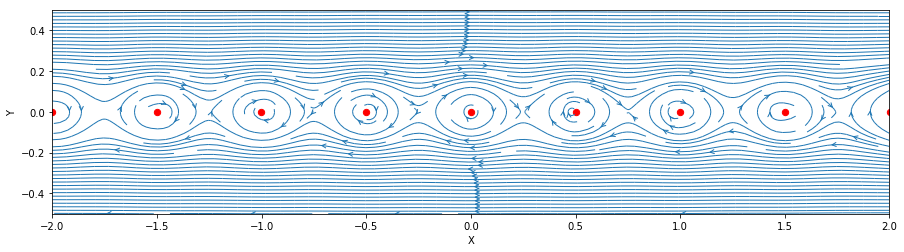

In [159]:
#plot the streamlines
width = 15
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('X')
pyplot.ylabel('Y')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, numpy.zeros(x_vortex.size,), color='r', s=40, marker='o');